# Analyze of "Around the world in 80 days”

**Authors: Kacper Grzelak and Maciej Ulewski**

Our task was to download the book "Around the world in 80 days” written by J. Verne and find places which the main actor visit. We will try first to create a list of cities using GeoText library, then we will analyze the result.

In [1]:
from geotext import GeoText
from geopy.geocoders import Nominatim
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import spacy
from spacy.lang.en import English
from spacy import displacy 
import string 
import en_core_web_sm


from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk
from nltk import bigrams
import networkx as nx
from nltk.tokenize import sent_tokenize
import nltk.data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

import requests
import re
from  bs4 import BeautifulSoup
from collections import Counter

r = requests.get('http://www.gutenberg.org/files/103/103-h/103-h.htm')
soup = BeautifulSoup(r.content, 'html.parser')
book = soup.find_all(['h4','p']) 


We found out that the names of the chapters are bolded and wrote with the h4 tag on the webpage. 

In [2]:
i = 0
chapter_name = ['']
chapters = [''] * 38
for chapter in book:
    if chapter.name == 'h4':
        i += 1
        chapter_name.append(str(chapter))
    if chapter.name == 'p':
        chapters[i] = str(chapters[i]) + '' + chapter.text.replace("\r\n"," ").replace("”",'"').replace("“",'"').replace("’","'")

chapters.pop(0)
clean_names = [ i.replace('<br/>',"").replace('</h4>',"").replace('<h4 align="center">',"").replace("\r\n"," ").replace("”",'"').replace("“",'"').replace("’","'") for i in chapter_name]
clean_names.pop(0)
print(len(clean_names))

37


And as it is in the book we separated chapters from the book, there are 37 chapters and in the table below you can see the first couple of words from each of them.

In [3]:
df = pd.DataFrame(zip(clean_names,chapters),index = pd.Series(np.arange(1,len(clean_names)+1,1)), columns= ['Title of the chapter', 'Text'])
df

,Title of the chapter,Text
1,IN WHICH PHILEAS FOGG AND PASSEPARTOUT ACCEPT...,"Mr. Phileas Fogg lived, in 1872, at No. 7, Sa..."
2,IN WHICH PASSEPARTOUT IS CONVINCED THAT HE HA...,"""Faith,"" muttered Passepartout, somewhat flur..."
3,IN WHICH A CONVERSATION TAKES PLACE WHICH SEE...,"Phileas Fogg, having shut the door of his hou..."
4,"IN WHICH PHILEAS FOGG ASTOUNDS PASSEPARTOUT, ...","Having won twenty guineas at whist, and taken..."
5,"IN WHICH A NEW SPECIES OF FUNDS, UNKNOWN TO T...",Phileas Fogg rightly suspected that his depar...
6,"IN WHICH FIX, THE DETECTIVE, BETRAYS A VERY N...",The circumstances under which this telegraphi...
7,WHICH ONCE MORE DEMONSTRATES THE USELESSNESS ...,"The detective passed down the quay, and rapid..."
8,"IN WHICH PASSEPARTOUT TALKS RATHER MORE, PERH...","Fix soon rejoined Passepartout, who was loung..."
9,IN WHICH THE RED SEA AND THE INDIAN OCEAN PRO...,The distance between Suez and Aden is precise...
10,IN WHICH PASSEPARTOUT IS ONLY TOO GLAD TO GET...,Everybody knows that the great reversed trian...


## Finding the cities

The first task was to find all of the cities that they travel through in the book and visualize them on the map. It was not an easy question because first of all, we have to take from all of the chapters words that could mean the name of some city. We use this GeoText library and it created the list of 90 cities. Of course, it is too many of them so we tried to pick only the words that mean the city that they pass through.<br>

To create such a list we needed to specify the words which can be in the same sentence with the names. We called these words "key_words". The second thought we had was that the names of the main characters could be recognized as names of the cities so we changed it a little.

In [4]:
key_words = ['from','arrived','left','reached','visited','reach','passing','departed',' abandoned','stayed','stopped',
             'arrival','From','Arrived','Left','Reached','Visited','Reach','Passing',
             'Departed',' Abandoned','Stayed','Stopped']
# key words around a city name can suggest a visit there

visited_cities = []

def change_names(par):
    par = par.replace("Bombay", "Mumbai")
    par = par.replace("Calcutta", "Kolkata")
    par = par.replace('Medicine Bow', 'Wyoming')
    par = par.replace('Fort Kearney', 'Minden')
    par = par.replace("Stuart","MrsS")
    par = par.replace("Forster","MrsF")
    par = par.replace("Wilson","MrsW")
    par = par.replace("Reno","MrsR")
    return par

words = []
for paragraph in chapters:
    paragraph= change_names(paragraph)
    sentences = re.split(r'[.|;|!|?]', paragraph)#creating list of sentences


    for sentence in sentences:
        places = GeoText(sentence)
        names_cities = places.cities
        if len(names_cities) > 0:
            words = sentence.replace(",","").replace(":","").split(" ")
            correct_words = [x for x in words if x != '']
            for word in correct_words:     
                if word in key_words:
                    visited_cities = visited_cities + names_cities
                    break

In [5]:
print(len(set(visited_cities)))
print(set(visited_cities))

43
{'San Francisco', 'London', 'Cedar', 'Brindisi', 'Fort Wayne', 'Durant', 'Sacramento', 'Oakland', 'Queenstown', 'Missouri', 'Auburn', 'Yokohama', 'Bay', 'West End', 'Columbus', 'New York', 'Suez', 'Kearney', 'Liverpool', 'Sioux', 'Southampton', 'Chicago', 'Formosa', 'Salt Lake', 'Malacca', 'Aden', 'San Pablo', 'Bordeaux', 'Golden Gate', 'Ogden', 'Omaha', 'Wyoming', 'Pittsburgh', 'Mumbai', 'Asia', 'Holland', 'Shanghai', 'Laramie', 'Kolkata', 'North Platte', 'Minden', 'Dublin', 'Fremont'}


There are 43 cities that were mentioned and have key_words in the sentence, the list is too long, we can see that there are names of the bridge in this list and other places which was not the original road.

In [6]:
Counter(visited_cities).most_common()
new_cities = []
for city,value in Counter(visited_cities).items():
    if value >1:
        new_cities.append(city)

In [7]:
print("List of unique Places: ",new_cities)
print(len(new_cities))

List of unique Places:  ['London', 'Suez', 'Brindisi', 'Aden', 'Mumbai', 'Kolkata', 'Yokohama', 'San Francisco', 'Shanghai', 'New York', 'Liverpool', 'Omaha', 'Salt Lake', 'Sacramento', 'Missouri', 'Ogden', 'Wyoming', 'Sioux', 'Chicago']
19


As you can see there are 19 names of the cities that were mentioned more than once and have our key_words in the sentence. It is really close to the original version of the list because as you can see below only 5 cities were missing from our list. In the part below, we will try to figure out which ones are these cities.

In [8]:
actual_cities = ['London', 'Paris', 'Turin', 'Brindisi', 'Suez', 'Aden', 'Mumbai', 'Allahabad', 'Kolkata', 
                 'Singapore', 'Hong Kong', 'Shanghai', 'Yokohama', 'San Francisco', 'Salt Lake', 'Wyoming', 
                 'Fort Kearney', 'Omaha', 'Chicago', 'New York', 'Cobh', 'Dublin', 'Liverpool']
print(len(actual_cities))

23


In [9]:
diff = set(actual_cities) - set(new_cities) 
print(diff)

{'Cobh', 'Singapore', 'Turin', 'Paris', 'Allahabad', 'Dublin', 'Hong Kong', 'Fort Kearney'}


In [10]:
print(set(new_cities) - set(actual_cities))

{'Missouri', 'Ogden', 'Sioux', 'Sacramento'}


In [11]:
print(GeoText('Mumbai').cities)
print(GeoText('Bombay').cities)
unknown = []
for i in diff:
    unknown.append(GeoText(i).cities)
print(f'Places that we can not find using GeoText library : {unknown}')

['Mumbai']
[]
Places that we can not find using GeoText library : [[], [], ['Turin'], ['Paris'], [], ['Dublin'], [], []]


As we can see, the library GeoText do not recognize cities that were printed and have some problems with "Bombay" so we changed that name in the text to "Mumbai" which is recognized.<br>

From the list of places which were in the difference matrix between our 19 and the original 23, 5 of them are not recognized by GeoText: Hong Kong', 'Allahabad', 'Cobh', 'Singapore' and 'Fort Kearney'.<br>

8 cities were not recognized by our code, but we have an extra 4, which was not on the original road.

In [12]:
chrome_user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36"
geolocator = Nominatim(timeout=10,user_agent=chrome_user_agent)


positions = dict()

for city in new_cities:
    while True:
        try: 
            position = geolocator.geocode(city)
        except:
            time.sleep(5)
            continue
        break
    if position:
        location=[position.latitude, position.longitude]
        positions.update({city:location})
        del position 
    else:
        print("Could not get position for {}".format(city))

print(positions)

{'London': [51.5073219, -0.1276474], 'Suez': [29.974498, 32.537086], 'Brindisi': [40.6362271, 17.688500723698695], 'Aden': [12.789585, 45.028504], 'Mumbai': [19.0759899, 72.8773928], 'Kolkata': [22.5414185, 88.35769124388872], 'Yokohama': [35.444991, 139.636768], 'San Francisco': [37.7790262, -122.4199061], 'Shanghai': [31.2322758, 121.4692071], 'New York': [40.7127281, -74.0060152], 'Liverpool': [53.407154, -2.991665], 'Omaha': [41.2587459, -95.9383758], 'Salt Lake': [40.6632297, -111.9103124], 'Sacramento': [38.5810606, -121.4938951], 'Missouri': [38.7604815, -92.5617875], 'Ogden': [41.2230048, -111.9738429], 'Wyoming': [43.1700264, -107.5685348], 'Sioux': [43.0574079, -96.1602368], 'Chicago': [41.8755616, -87.6244212]}


In [13]:
mapa = folium.Map(location=[0,0], zoom_start=2)

for city, location in positions.items():
    mapa.add_child(folium.Marker(location=location, popup=folium.Popup(city), icon=folium.Icon(color='red',icon='info-sign')))
    
locations = [item[1] for item in positions.items()]
loc_sort = sorted(locations, key = lambda x: x[1])
folium.PolyLine(loc_sort, color="red", weight=2.5, opacity=1).add_to(mapa)
  
mapa

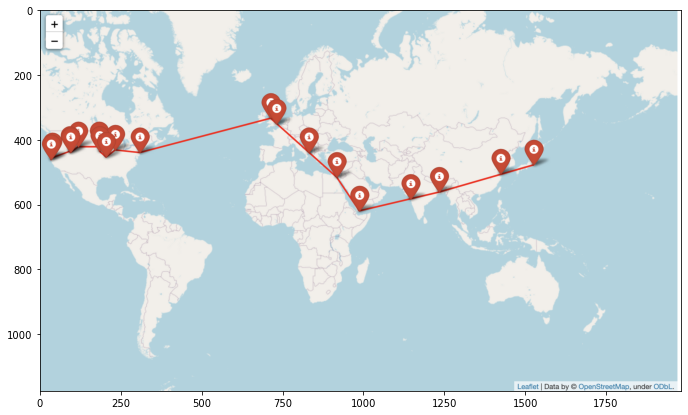

In [14]:
import matplotlib.image as mpimg
img = mpimg.imread('my_map.png')
plt.figure(figsize=(17,7))  
plt.imshow(img)
plt.show()

In [15]:
positions2 = dict()

for city in actual_cities:
    while True:
        try: 
            position2 = geolocator.geocode(city)
        except:
            time.sleep(5)
            continue
        break
    if position2:
        location=[position2.latitude, position2.longitude]
        positions2.update({city:location})
        del position2 
    else:
        print(f"Could not get position for {city}")
        


Below is the map with original travel route.

In [16]:
mapa = folium.Map(location=[0,0], zoom_start=2)

for city, location in positions2.items():
    mapa.add_child(folium.Marker(location=location, popup=folium.Popup(city), icon=folium.Icon(color='green',icon='ok')))
    
locations = [item[1] for item in positions2.items()]
loc_sort = sorted(locations, key = lambda x: x[1])
folium.PolyLine(loc_sort, color="green", weight=2.5, opacity=1).add_to(mapa)
  
mapa

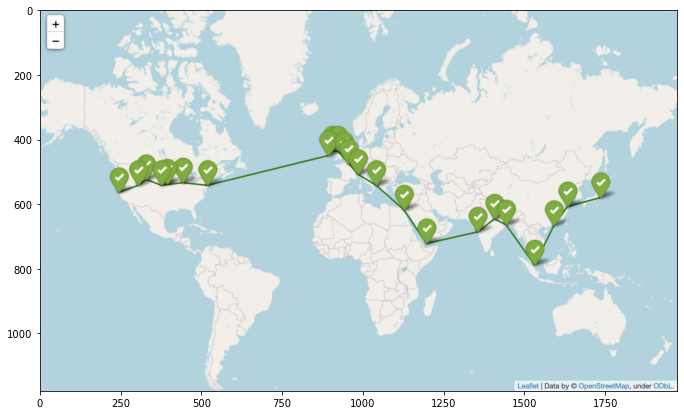

In [17]:
import matplotlib.image as mpimg
img = mpimg.imread('original_map.png')
plt.figure(figsize=(17,7))  
plt.imshow(img)
plt.show()

## Summary of the cities
As you can see there is a difference between the original travel route and our. It is because we did not want to modify our result because we know the answer, we tried to create a list that is as much automatically as it can be. That is the reason why we left on the map which they do not visit.<br>

As it was in the previous list we had some problem with dispaying our follium map in the gitlab so we applied screenshots of the results.

# Analyze of the written text in the book.
As it was in the task we will try to prepare full text analize, there will be a couple of subpoints in this chapter:<br>

**- Which letter was used the most in the text.**<br>
**- Find the longest sentence in the text and where it was written.**<br>
**- Visualize the character mentions per page/chapter.**<br>
**- Find the top 20 keywords in book/chapter - you can also check the most
popular words in case of part of the speech.**<br>
**- Visualization sentiment per page/chapter (you can use different algorithms
for sentiment).**<br>
**- Visualize graph of co-occurrences (defined as mentions on the same
page).**

## 1. Which letter was used the most in the text.

In [18]:
nlp1 = en_core_web_sm.load()
nlp2=English()
nlp2.add_pipe(nlp2.create_pipe('sentencizer'))

In [19]:
def count_characters(par):
    letters = {'a':0, 'b':0, 'c':0, 'd':0, 'e':0, 'f':0, 'g':0, 'h':0, 'i':0, 'j':0, 'k':0, 'l':0, 'm':0, 'n':0, 'o':0,
               'p':0, 'q':0, 'r':0, 's':0, 't':0, 'u':0, 'v':0, 'w':0, 'x':0, 'y':0, 'z':0}
    text = par.lower()
    for char in text:
        if char in letters.keys():
            letters[char] += 1
    return(letters) 

We created a dictionary "letters" which will count the letters in the words in text.

In [20]:
counted_per_chapter = []

for chapter in chapters:
    counted_per_chapter.append(count_characters(chapter))

In [21]:
whole_book = ''
for chapter in chapters:
    whole_book = whole_book + chapter

In [22]:
print(len(whole_book))  # number of characters in whole book (including spaces, punctuation etc.)

363136


Upper you can see the number of characters in whole book (including spaces, punctuation etc.)

In [23]:
book_counted_characters = count_characters(whole_book)

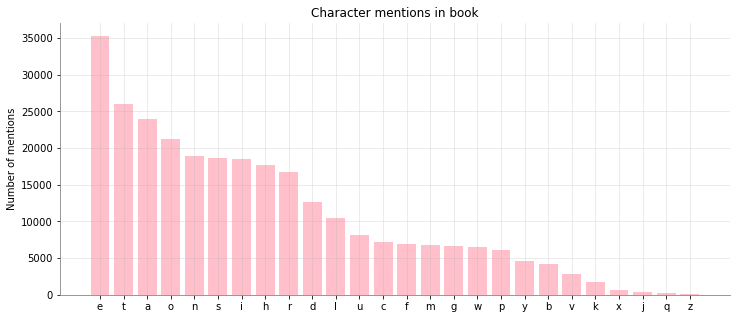

In [24]:
book_counted_sorted = sorted([[chars, counts] for chars, counts in book_counted_characters.items()], key = lambda x: x[1], reverse=True)
characters = [x[0] for x in book_counted_sorted]
counts = [x[1] for x in book_counted_sorted]

fig, ax = plt.subplots(1,1, figsize=(12, 5))
ax.bar(range(len(book_counted_characters)), counts, align = 'center', color='pink')
ax.set_xticks(range(len(book_counted_characters)))
ax.set_xticklabels(characters)
ax.set_title('Character mentions in book')
ax.set_ylabel('Number of mentions')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color(None)
ax.spines['left'].set_color('0.5')
ax.spines['right'].set_color(None)
ax.grid(alpha=0.3)
plt.show()

As we can see the most popular character which was used in the book is 'e'.

## 2. Find the longest sentence in the text and where it was written.

In this part we separated our book into sentences using tokenizer.

In [25]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(whole_book)
print(sentences[:10])

[' Mr. Phileas Fogg lived, in 1872, at No.', '7, Saville Row, Burlington Gardens, the house in which Sheridan died in 1814.', 'He was one of the most noticeable members of the Reform Club, though he seemed always to avoid attracting attention; an enigmatical personage, about whom little was known, except that he was a polished man of the world.', 'People said that he resembled Byron—at least that his head was Byronic; but he was a bearded, tranquil Byron, who might live on a thousand years without growing old.', 'Certainly an Englishman, it was more doubtful whether Phileas Fogg was a Londoner.', 'He was never seen on \'Change, nor at the Bank, nor in the counting-rooms of the "City"; no ships ever came into London docks of which he was the owner; he had no public employment; he had never been entered at any of the Inns of Court, either at the Temple, or Lincoln\'s Inn, or Gray\'s Inn; nor had his voice ever resounded in the Court of Chancery, or in the Exchequer, or the Queen\'s Bench

In [26]:
print(len(sentences))

3653


There is 3653 sentences in the text.

In [27]:
# The longest sentence
sentence_lengths = [len(sentence) for sentence in sentences]
print('The longest sentence has ' + str(max(sentence_lengths)) + ' characters.\n')
longest_sentence = sentences[sentence_lengths.index(max(sentence_lengths))]
print(longest_sentence)

i = 1       # chapter with this sentence
for chapter in chapters:
    if longest_sentence in chapter:
        print('\n The longest sentence is in chapter number ' + str(i))
    i += 1

The longest sentence has 725 characters.

Several of the audience, not being much interested in the missionary's narrative, here left the car; but Elder Hitch, continuing his lecture, related how Smith, junior, with his father, two brothers, and a few disciples, founded the church of the "Latter Day Saints," which, adopted not only in America, but in England, Norway and Sweden, and Germany, counts many artisans, as well as men engaged in the liberal professions, among its members; how a colony was established in Ohio, a temple erected there at a cost of two hundred thousand dollars, and a town built at Kirkland; how Smith became an enterprising banker, and received from a simple mummy showman a papyrus scroll written by Abraham and several famous Egyptians.

 The longest sentence is in chapter number 27


As you can see we found the longest sentence from the book and the chapter where we can find it.

## 3. Visualize the character mentions per page/chapter.

The idea was to find all of the characters which was ment in the book, but we have some problems because there is no such library which will distinguish names of the places from names of the characters. We did not want to take the whole list from Wikipedia and just compare where the characters was meant but we tried to made it by ourself.<br>

Again we used key words, but this time it was about names of the places/cities etc. The result are really good, we separated 49 different characters, of course there can be some names of the places but as we thought before we would like to make it automatically.

In [28]:
text = whole_book.replace('"','').replace("‘","'").replace("—"," ")
words = []
tokenized = word_tokenize(text)
tagged = nltk.pos_tag(tokenized)
prefix = ['Mr.','Miss','Mrs.','Dr.','St.','Sir','Stoke','Swandam','Lone','San','Lord', 'Upper','New','Daily',
          'Fort','Hong','Sea','Illustrated','International','Pacific','Oriental','Long','Empire','River']
place_prefix = ['Street','Avenue', 'Garden','God','Von','Cross','Bank','Station',
                'St.','Yard','Lodge','Pool','Beeches','Square','Farm','Road','Court','Valley','League','Bridge',
                'Klan','Cosmopolitan','House','Gate','Post','Spence','East','North','West','South','Pacific','India','Club',
               'Sea','International','Pacific','Oriental','Lake','Point','Mountains','Society','Empire','River']
for i in range(len(tagged)-1):
    if (tagged[i][1] == 'NNP') & (tagged[i+1][1] == 'NNP'):
        if (tagged[i][0] not in prefix) & (tagged[i+1][0] not in place_prefix):
            words.append(tagged[i][0] + ' ' + tagged[i+1][0])

In [29]:
print(len(set(words)))

159


In [30]:
Counter(words).most_common()
new_words = []
for name,number in Counter(words).items():
    if number >1:
        new_words.append(name)
        
print(len(set(new_words)))

49


In [31]:
print(set(new_words))

{'Samuel Wilson', 'Monsieur Fogg', 'Samuel Fallentin', 'London News', 'Thomas Flanagan', 'Medicine Bow', 'Colonel Stamp', 'Malabar Hill', 'Pall Mall', 'William Hitch', 'Sierra Nevada', 'Great Salt', 'Madame Tussaud', 'Phileas Fogg', 'Day Saints', 'John Bunsby', 'Andrew Speedy', 'Rock Island', 'James Strand', 'Colonel Proctor', 'Captain Speedy', 'India Company', 'Lake City', 'Francis Cromarty', 'Judge Obadiah', 'Latter Day', 'Honourable Mr.', 'Elder William', 'Plum Creek', 'Humboldt Range', 'Captain Fogg', 'Andrew Stuart', 'Stamp Proctor', 'Gauthier Ralph', 'LONG NOSES', 'General Grant', 'Brigham Young', 'Reverend Samuel', 'Joseph Smith', 'Elder Hitch', 'Monsieur Fix', 'James Forster', 'William Batulcar', 'North Platte', 'Bitter Creek', 'Peninsular Company', 'Peninsula Railway', 'Saville Row', 'John Sullivan'}


In [32]:
characters_on_chapter = []
grouped = []
i = 1
chapt = []
for chapter in chapters:
    for name in new_words:
        if name in chapter:
            characters_on_chapter.append(name)
            chapt.append(i)
    i+=1
            
            
characters_on_chapter = pd.DataFrame(data = zip(characters_on_chapter,chapt),columns = ['Name','Chapter'])
characters_on_chapter['Chapter'] = characters_on_chapter['Chapter'].astype(object)
grouped = characters_on_chapter.groupby(['Name']).sum().reset_index()
grouped = grouped.rename(columns={'Chapter': 'Mentions in book'})
grouped.reset_index(drop=True, inplace=True)
grouped.sort_values('Mentions in book', ascending=False).head(5)

,Name,Mentions in book
37,Phileas Fogg,676
43,Saville Row,144
6,Colonel Proctor,112
45,Stamp Proctor,82
14,Great Salt,81


As we could expect, the most mentions were main character of the novel - Phileas Fogg, his street where he lived - Saville Row and other person Colonel Proctor.

## 3. Visualization sentiment per page/chapter.

As we did it in our last two assignments we tried here prepare sentiment visualization per page and per chapter. We created a function which is based on the Vader package and create the mean of sentiment in the given list.

In [33]:
nlp2 = English()
nlp2.add_pipe(nlp2.create_pipe('sentencizer'))
def sentence_tokinization(text):
    my_doc = nlp2(text)
    return [sent_token.text.strip() for sent_token in my_doc.sents]

In [34]:
df["Sentences"] = df["Text"].apply(sentence_tokinization)

In [35]:
def sentiment_scores(sentence): 
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    
    return sentiment_dict

In [36]:
def chapters_sentiment(df_sentences,chapters_num):
    NEG = []
    NEU = []
    POS = []
    COMP = []
    
    for i in range(1,chapters_num+1):
        sentences = df_sentences[i]
        
        neg = []
        neu = []
        pos = []
        comp = []
        
        for j in range(len(sentences)):
            
            d = sentiment_scores(sentences[j])
            neg.append(d['neg'])
            neu.append(d['neu'])
            pos.append(d['pos'])
            comp.append(d['compound'])
            
        NEG.append(np.mean(neg))
        NEU.append(np.mean(neu))
        POS.append(np.mean(pos))
        COMP.append(np.mean(comp))
    return NEG,NEU,POS,COMP

In [37]:
NEG,NEU,POS,COMP = chapters_sentiment(df["Sentences"],37)

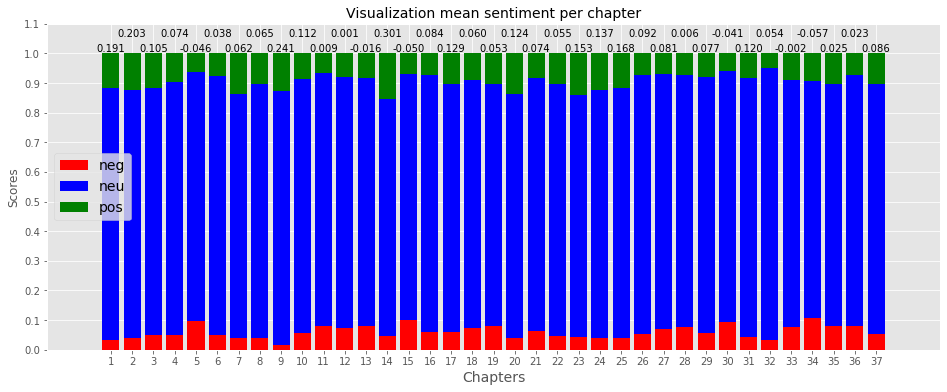

In [38]:
neg, neu, pos, compound = NEG, NEU, POS, COMP
level = [sum(x) for x in zip(neg, neu)]
ind = [i for i in range(1,len(NEG)+1)]

plt.style.use('ggplot')
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(111)

p1 = plt.bar(ind,neg, color='red')
p2 = plt.bar(ind, neu, bottom=neg, color='blue')
p3 = plt.bar(ind, pos, bottom=level, color='green')  

for en,rect in enumerate(p3):
    if en%2 == 0:
        height = 1
    else:
        height = 1.05    
    plt.text(en+1, height,  "%.3f" % compound[en], ha='center', va='bottom',fontsize=10)

plt.ylabel('Scores')
plt.xlabel('Chapters',fontsize=14)
plt.title('Visualization mean sentiment per chapter',fontsize=14)    
    
plt.xlim([-2,40])
plt.xticks(ind, range(1,len(NEG)+1))
plt.yticks(np.arange(0, 1.2,0.1))
plt.legend((p1[0], p2[0],p3[0]), ('neg', 'neu','pos'),fontsize=14,loc=6)
ax.yaxis.grid(True)
plt.show()

As we can assume the chapter which has the most negative sentences was chapter number 34 and the most positive was number 14.

In this part we will use our function to analyze sentiment throught the pages, our function separated text and created pages. As it was in the assignment the page should end around 250-300 word.

In [39]:
import random as rn
count_of_pages=[]
counter=1
pages=[]
cun = 0
for j in range(1,38):
    chap=df.Text[j]
    text=''
    rn_counter=250+rn.randint(0,50)
    i=0
    for word in chap.split():
        text+=word+' '
        i+=1
        if i==rn_counter:
            pages.append(text)
            text=''
            rn_counter=250+rn.randint(0,50)
            i=0
            count_of_pages.append(counter)
            counter+=1
    pages.append(text)
    count_of_pages.append(counter)
    counter+=1
dfpage=pd.DataFrame(zip(count_of_pages,pages),columns= ['Number of page', 'Text'])

In [40]:
number = []
text = []
for i in range(len(dfpage)):
    number.append(dfpage['Number of page'][i])
    text.append(sentence_tokinization(dfpage['Text'][i]))
dfpage_2 = pd.DataFrame(zip(number,text),columns=['Number of page', 'Text'])
dfpage_2

,Number of page,Text
0,1,"[Mr. Phileas Fogg lived, in 1872, at No., 7, S..."
1,2,[the purpose of abolishing pernicious insects....
2,3,"[travelled everywhere, at least in the spirit...."
3,4,[gallery with its dome supported by twenty red...
4,5,"[daily habit, quit Saville Row, and repair to ..."
...,...,...
237,238,"[indicated eighteen minutes to nine., The play..."
238,239,"[Yes; Phileas Fogg in person., The reader will..."
239,240,"[the journey round the world in eighty days!, ..."
240,241,"[His object was, however, to be victorious, an..."


In [41]:
NEG,NEU,POS,COMP = chapters_sentiment(dfpage_2['Text'][:41],40)

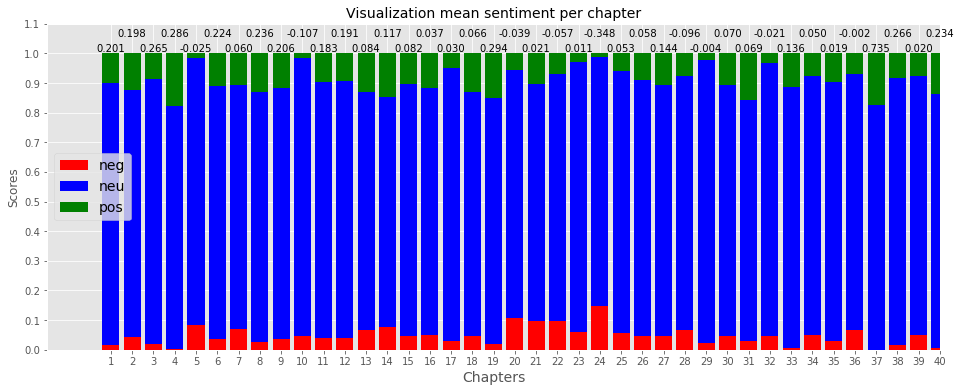

In [42]:
neg, neu, pos, compound = NEG, NEU, POS, COMP
level = [sum(x) for x in zip(neg, neu)]
ind = [i for i in range(1,len(NEG)+1)]

plt.style.use('ggplot')
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(111)

p1 = plt.bar(ind,neg, color='red')
p2 = plt.bar(ind, neu, bottom=neg, color='blue')
p3 = plt.bar(ind, pos, bottom=level, color='green')  

for en,rect in enumerate(p3):
    if en%2 == 0:
        height = 1
    else:
        height = 1.05    
    plt.text(en+1, height,  "%.3f" % compound[en], ha='center', va='bottom',fontsize=10)

plt.ylabel('Scores')
plt.xlabel('Chapters',fontsize=14)
plt.title('Visualization mean sentiment per chapter',fontsize=14)    
    
plt.xlim([-2,40])
plt.xticks(ind, range(1,len(NEG)+1))
plt.yticks(np.arange(0, 1.2,0.1))
plt.legend((p1[0], p2[0],p3[0]), ('neg', 'neu','pos'),fontsize=14,loc=6)
ax.yaxis.grid(True)
plt.show()

We decidet to show the results only for the first 40 pages because there are too many of them to show them all. As we can observe, 25th page was really negative and 20th was the most possitive page.

## 4. Find the top 20 keywords in book/chapter.

It is one of the last parts of our raport and we had to find the most common 20 words in the text, we have created function which is taking our text and serching for part of the speach that we will looking for.

In [43]:
def get_words(text,part_of_speach):
    text = text.replace('"','').replace("‘","'").replace(":"," ").replace(";"," ").replace("?","").replace("!","")#.replace(",","").replace(".","")
    words = {}
    tokenized = word_tokenize(text)
    tagged = nltk.pos_tag(tokenized)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) 
    #Nouns
    if part_of_speach == 'Noun':
        for word, tag in tagged:
            if tag.startswith('N'):
                 wtag = wordnet.NOUN
            else:
                continue
            lemma = lemmatizer.lemmatize(word, pos=wtag)

            if lemma in words.keys():
                words[lemma] += 1
            else:
                words[lemma] = 1
    #Adjectives
    elif part_of_speach == 'Adjective':
        for word, tag in tagged:
            if tag.startswith('J') & (word not in stop_words):      
                 wtag = wordnet.ADJ
            else:
                continue
            lemma = lemmatizer.lemmatize(word, pos=wtag)

            if lemma in words.keys():
                words[lemma] += 1
            else:
                words[lemma] = 1
    #Adverb       
    elif part_of_speach == 'Adverb':
        for word, tag in tagged:
            if tag.startswith('R'):
                wtag = wordnet.ADV
            else:
                continue
            lemma = lemmatizer.lemmatize(word, pos=wtag)

            if lemma in words.keys():
                words[lemma] += 1
            else:
                words[lemma] = 1
    elif part_of_speach == 'Verb':
        for word, tag in tagged:
            if tag.startswith('V'):
                 wtag = wordnet.VERB
            else:
                continue
            lemma = lemmatizer.lemmatize(word, pos=wtag)

            if lemma in words.keys():
                words[lemma] += 1
            else:
                words[lemma] = 1
    else:
        print('Chose correct part of language')
    
    
    return(words)

In [44]:
adj = get_words(whole_book,'Adjective')
nouns = get_words(whole_book,'Noun')
adverbs = get_words(whole_book,'Adverb')
verbs = get_words(whole_book,'Verb')

In [45]:
#top 20 words in 3 different chapters
numbers = [2,10,17]
for i in numbers:
    words_book = get_words(chapters[i],'Noun')
    keywords = sorted([[words, counts] for words, counts in words_book.items()], key = lambda x: x[1], reverse=True)
    print(f'Top 10 noun for chapter number {i}: ')
    print(keywords[:9])

Top 10 noun for chapter number 2: 
[['Fogg', 24], ['Stuart', 19], ['Phileas', 13], ['Mr.', 12], ['Ralph', 10], ['pound', 10], ['day', 10], ['Bank', 6], ['world', 6]]
Top 10 noun for chapter number 10: 
[['Fogg', 28], ['Sir', 22], ['Francis', 22], ['Mr.', 19], ['Passepartout', 15], ['elephant', 13], ['train', 12], ['Phileas', 9], ['time', 8]]
Top 10 noun for chapter number 17: 
[['Fogg', 16], ['steamer', 11], ['Passepartout', 11], ['Mr.', 11], ['Hong', 8], ['Kong', 8], ['hour', 8], ['Yokohama', 7], ['Rangoon', 6]]


As it was in the character analysts Fogg is the most popular noun in the book.

In [46]:
adj_sorted = sorted([[words, counts] for words, counts in adj.items()], key = lambda x: x[1], reverse=True)
noun_sorted = sorted([[words, counts] for words, counts in nouns.items()], key = lambda x: x[1], reverse=True)
verbs_sorted = sorted([[words, counts] for words, counts in verbs.items()], key = lambda x: x[1], reverse=True)
adverbs_sorted = sorted([[words, counts] for words, counts in adverbs.items()], key = lambda x: x[1], reverse=True)
print('The most common adjectives are: \n')
print(adj_sorted[0:19])
print('The most common nouns are: \n')
print(noun_sorted[0:19])
print('The most common verbs are: \n')
print(verbs_sorted[0:19])
print('The most common adverbs are: \n')
print(adverbs_sorted[0:19])

The most common adjectives are: 

[['great', 67], ['last', 58], ['good', 55], ['little', 52], ['least', 52], ['young', 43], ['first', 42], ['long', 41], ['several', 39], ['next', 39], ['large', 38], ['Indian', 34], ['necessary', 29], ['high', 28], ['English', 28], ['much', 26], ['full', 25], ['certain', 24], ['many', 24]]
The most common nouns are: 

[['Fogg', 607], ['Passepartout', 384], ['Mr.', 374], ['Fix', 245], ['Phileas', 216], ['day', 155], ['hour', 144], ['time', 141], ['train', 137], ['Aouda', 136], ['master', 123], ['steamer', 101], ['mile', 76], ['man', 75], ['hand', 70], ['minute', 66], ['passenger', 66], ['detective', 65], ['London', 64]]
The most common verbs are: 

[['be', 2313], ['have', 850], ['do', 254], ['say', 232], ['go', 203], ['take', 155], ['make', 151], ['leave', 125], ['pass', 105], ['reply', 98], ['seem', 95], ['find', 95], ['know', 86], ['get', 83], ['reach', 82], ['think', 81], ['see', 77], ['come', 74], ['ask', 70]]
The most common adverbs are: 

[['not', 

Here we prepare some example of words and their amount in the book, after we know this 4 classes we can prepare plot which will show us the amount of exact part of the language in the chapters.

In [47]:
noun_per_chap = []
adj_per_chap = []
vrb_per_chap = []
advrb_per_chap = []
for chapter in chapters:
    count_nouns = get_words(chapter,'Noun')
    count_adj = get_words(chapter,'Adjective')
    count_adverbs = get_words(chapter,'Adverb')
    count_verbs = get_words(chapter,'Verb')
    keywords_noun = sum([counts for words, counts in count_nouns.items()])
    keywords_adj = sum([counts for words, counts in count_adj.items()])
    keywords_vrb = sum([counts for words, counts in count_verbs.items()])
    keywords_advrb = sum([counts for words, counts in count_adverbs.items()])
    noun_per_chap.append(keywords_noun)
    adj_per_chap.append(keywords_adj)
    vrb_per_chap.append(keywords_vrb)
    advrb_per_chap.append(keywords_advrb)
chapters_qty = np.arange(1,38)
words_per_chap = pd.DataFrame(data = {'Chapter number':chapters_qty,'Sum of Nouns':noun_per_chap,'Sum of Adj':adj_per_chap,
                                        'Sum of Verbs':vrb_per_chap,'Sum of Adverbs':advrb_per_chap})

In [48]:
words_per_chap.head(5)

,Chapter number,Sum of Nouns,Sum of Adj,Sum of Verbs,Sum of Adverbs
0,1,369,114,246,95
1,2,281,105,192,63
2,3,507,116,343,122
3,4,254,53,180,71
4,5,266,55,144,46


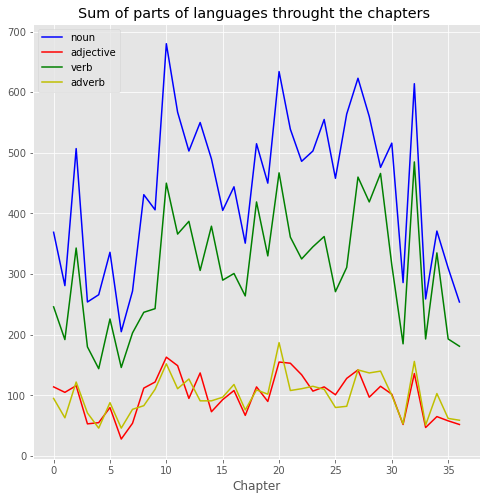

In [49]:
plt.figure(figsize = (8,8))
plt.plot(words_per_chap['Sum of Nouns'],'b',label = 'noun')
plt.plot(words_per_chap['Sum of Adj'],'r',label = 'adjective')
plt.plot(words_per_chap['Sum of Verbs'],'g',label = 'verb')
plt.plot(words_per_chap['Sum of Adverbs'],'y',label = 'adverb')
plt.title('Sum of parts of languages throught the chapters ')
plt.xlabel('Chapter')
plt.legend()
plt.show()

The result are not suprising, there is a lot of nouns and verbs which are the basis of sentence syntax. We can find out also that most of the chapters has the same amount of adjectives and adverbs.

## 5. Visualize graph of co-occurrences.

Last part of our job was to prepare graphs co-occurances, we used for this combined function from the last part and networkx library to create a graph.

In [50]:
def words_graph(text):
    text = text.replace('"','').replace("‘","'").replace(":"," ").replace(";"," ").replace("?","").replace("!","")
    words = []
    tokenized = word_tokenize(text)
    tagged = nltk.pos_tag(tokenized)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    stop_words.add("n't")
    
    for word, tag in tagged:
        if word in stop_words:
            continue
        if tag.startswith('N'):      
            wntag = wordnet.NOUN
        elif tag.startswith('V'):
            wntag = wordnet.VERB
        elif tag.startswith('J') & (word not in stop_words):
            wntag = wordnet.ADJ
        elif tag.startswith('R'):
            wntag = wordnet.ADV
        else:
            continue
        lemma = lemmatizer.lemmatize(word, pos=wntag)
        words.append(lemma)
    return(words)

In [51]:
def cooccur_graph(text, how_many, chapter_number):
    tokens = words_graph(text)
    bigram = list(bigrams(tokens))
    bigram_counts = Counter(bigram)
    bigram_df = pd.DataFrame(bigram_counts.most_common(how_many),
                             columns=['bigram', 'count'])
    
    d = bigram_df.set_index('bigram').T.to_dict('records')
    
    G = nx.Graph()

    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight=v)

    degree = dict(G.degree)

    plt.figure(figsize = (18,10)) 
    pos = nx.spring_layout(G, k=3, iterations=100)
    edge_width = [G[i][j]['weight']/5 for i,j in G.edges()]
    nx.draw(G, pos, font_size=15,
                     width=edge_width,
                     edge_color='grey', node_color='pink',
                     with_labels = True, 
                     nodelist=degree.keys(), node_size=[v * 300 for v in degree.values()])
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, font_size = 9)
    plt.title("Co-occurrences in chapter {p}".format(p=chapter_number), fontdict = {'fontsize' : 30})
    plt.show()

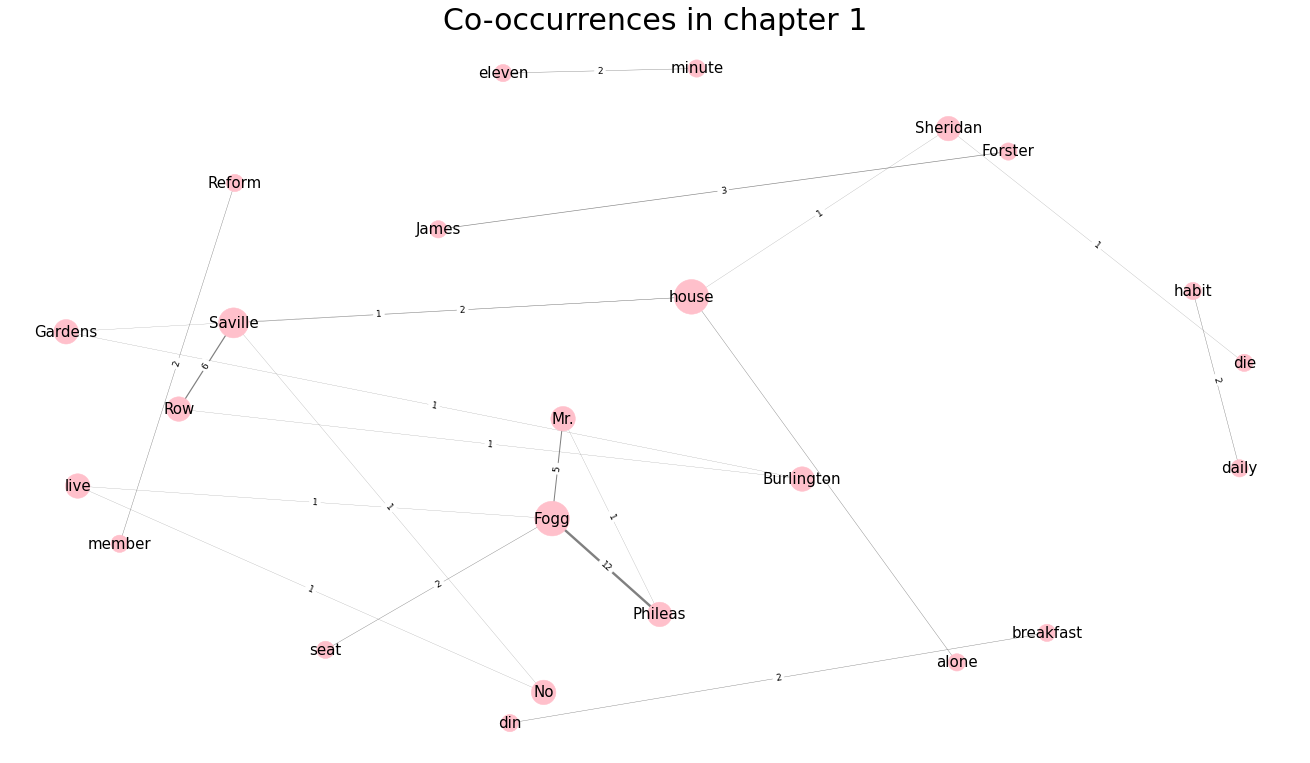

In [52]:
cooccur_graph(chapters[0],20,1)

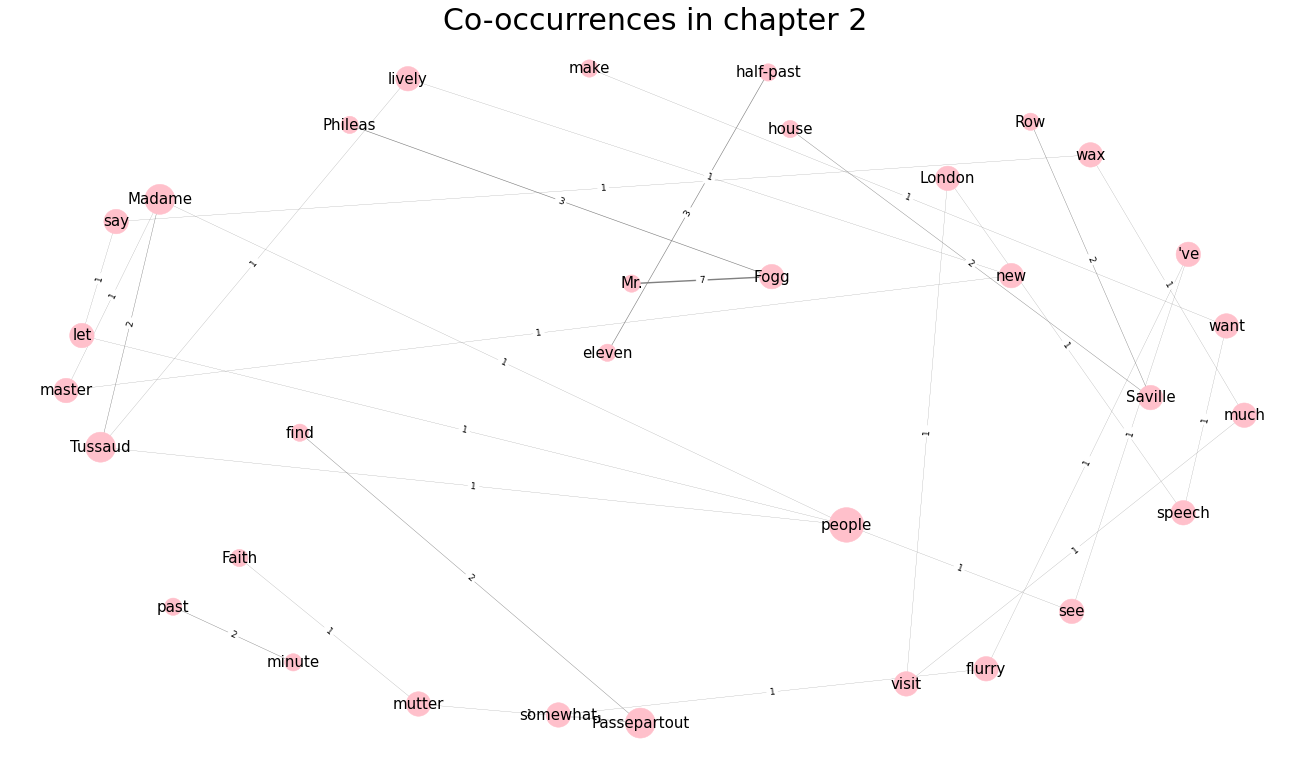

In [53]:
cooccur_graph(chapters[1],30,2)

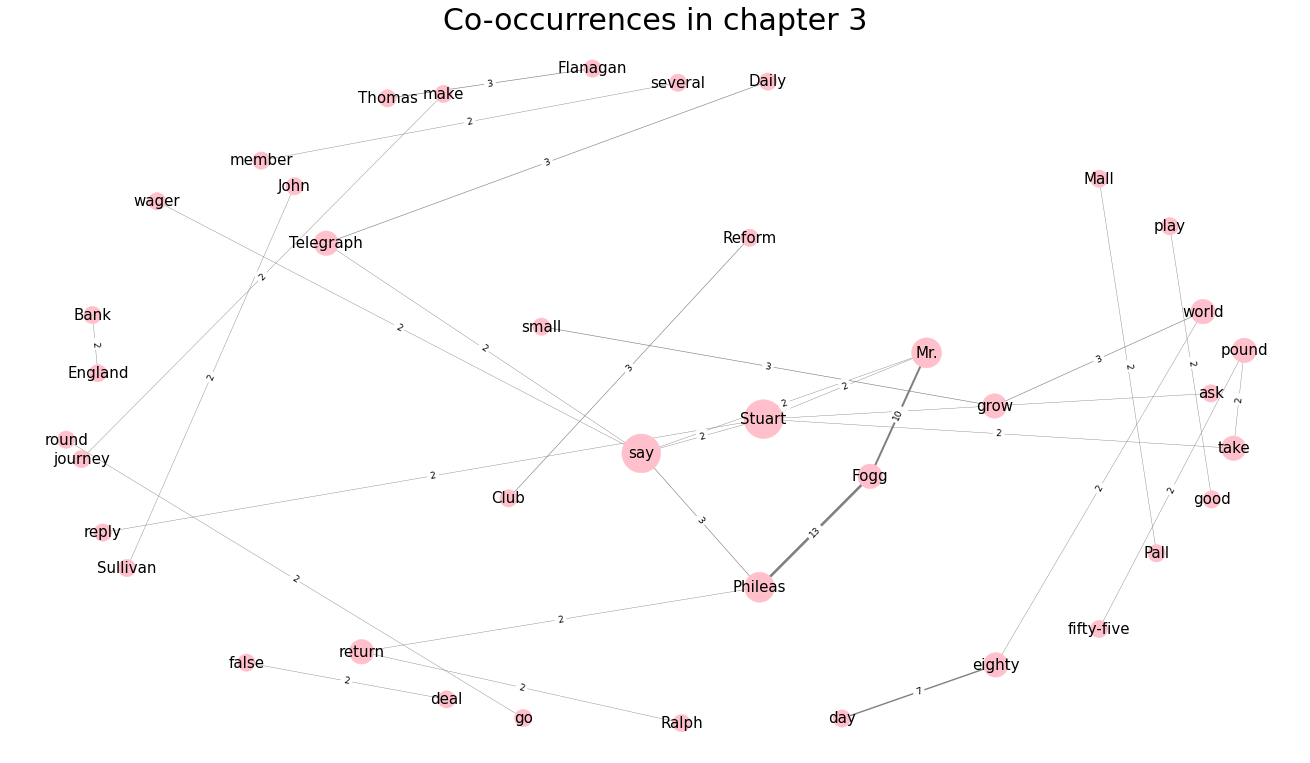

In [54]:
cooccur_graph(chapters[2],30,3)

As we can see on this graphs in all of this 3 chapters Phileas has the biggest amount of edges, which is naturaly for the main character. The rest of each graphs was depending on the place where they have been and the situation in the book.